<a href="https://colab.research.google.com/github/Hana3435/Hana_Alemayehu/blob/main/employee_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [140]:
# Load data
data = pd.read_csv('personal_data.csv')

In [141]:
data.head(5)

,IdPresenceDeclaration,OperatorCode,DeclarationDate,IdPresenceState
0,1,10.00.12,2014-09-30 08:00:00,1
1,2,10.00.12,2014-09-30 12:00:00,2
2,3,10.00.12,2014-09-30 13:00:00,1
3,4,10.00.12,2014-09-30 17:00:00,2
4,257,10.00.12,2014-10-01 08:00:00,1


In [142]:
data.isnull().sum()

,0
IdPresenceDeclaration,0
OperatorCode,0
DeclarationDate,0
IdPresenceState,0


no null value!


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609536 entries, 0 to 609535
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   IdPresenceDeclaration  609536 non-null  int64 
 1   OperatorCode           609536 non-null  object
 2   DeclarationDate        609536 non-null  object
 3   IdPresenceState        609536 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 18.6+ MB


In [144]:
data.describe()

,IdPresenceDeclaration,IdPresenceState
count,609536.000000,609536.0
mean,304768.500000,1.5
std,175958.031177,0.5
min,1.000000,1.0
25%,152384.750000,1.0
50%,304768.500000,1.5
75%,457152.250000,2.0
max,609536.000000,2.0


In [145]:
#  encode the 'OperatorCode'
label_encoder = LabelEncoder()
data['OperatorCode'] = label_encoder.fit_transform(data['OperatorCode'])


In [146]:
# Convert DeclarationDate to datetime format
data['DeclarationDate'] = pd.to_datetime(data['DeclarationDate'])

# Extract time-based features
data['Hour'] = data['DeclarationDate'].dt.hour
data['DayOfWeek'] = data['DeclarationDate'].dt.dayofweek  # Monday=0, Sunday=6
data['Month'] = data['DeclarationDate'].dt.month

# Encode OperatorCode (categorical variable) using Label Encoding
label_encoder = LabelEncoder()
data['OperatorCodeEncoded'] = label_encoder.fit_transform(data['OperatorCode'])

# Drop irrelevant columns (e.g., IdPresenceDeclaration, DeclarationDate, OperatorCode)
cleaned_data = data.drop(columns=['IdPresenceDeclaration', 'DeclarationDate', 'OperatorCode'])

# Display the first few rows of the cleaned data
cleaned_data.head()


,IdPresenceState,Hour,DayOfWeek,Month,OperatorCodeEncoded
0,1,8,1,9,0
1,2,12,1,9,0
2,1,13,1,9,0
3,2,17,1,9,0
4,1,8,2,10,0


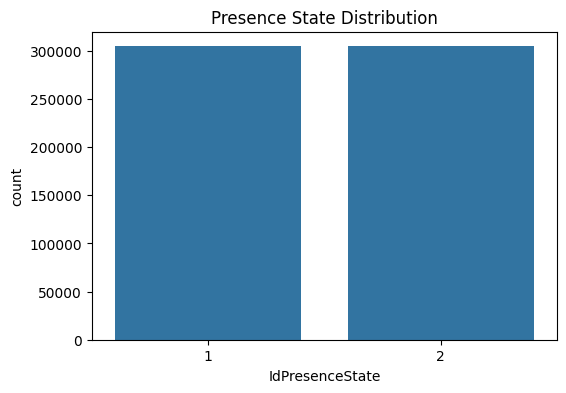

In [147]:
# Visualize the distribution of 'IdPresenceState'
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='IdPresenceState')
plt.title('Presence State Distribution')
plt.show()










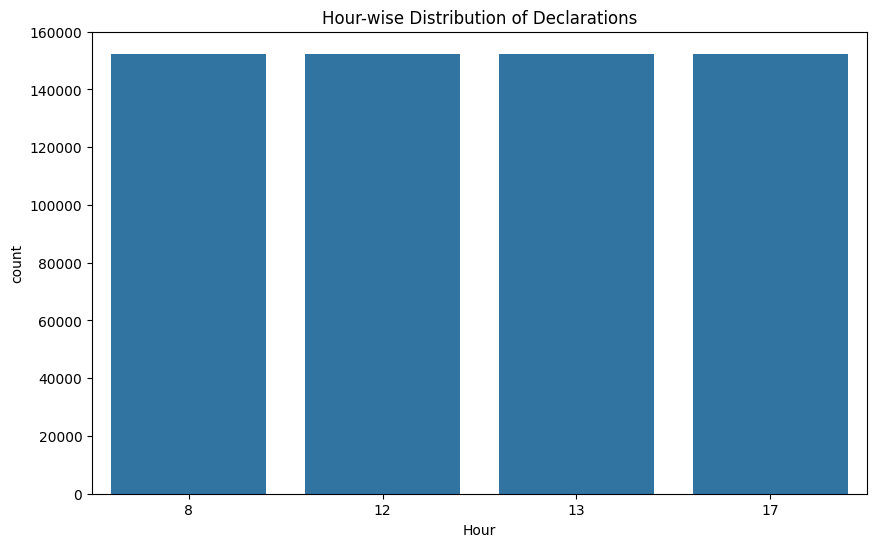

In [148]:
# Visualize the hour-wise distribution of records
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Hour')
plt.title('Hour-wise Distribution of Declarations')
plt.show()

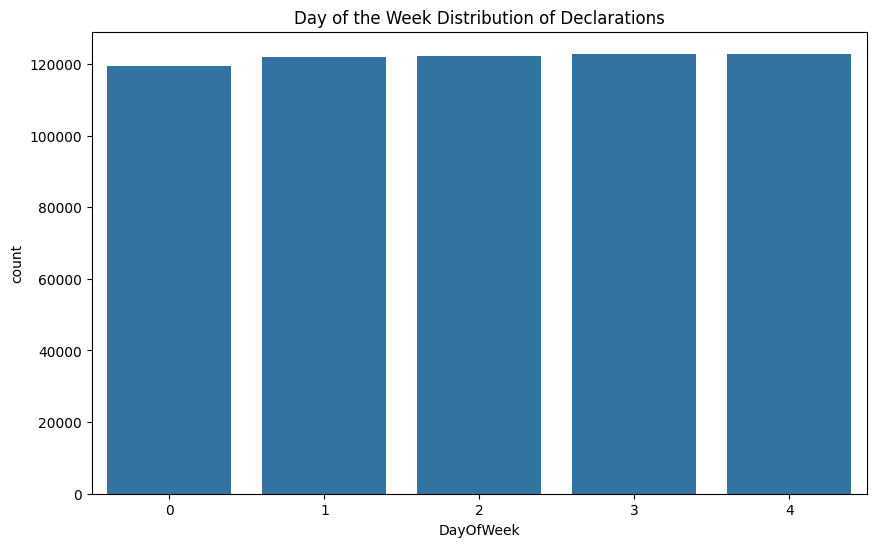

In [149]:
# Visualize the distribution of records by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='DayOfWeek')
plt.title('Day of the Week Distribution of Declarations')
plt.show()

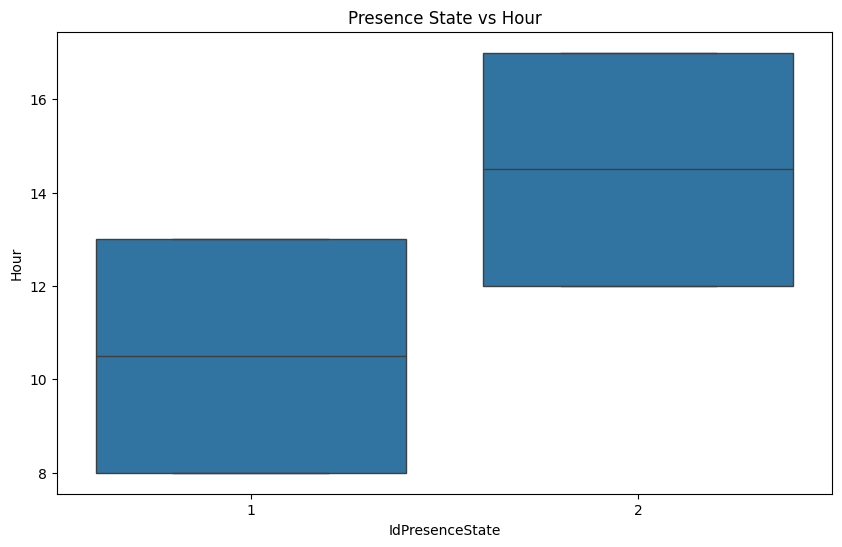

In [150]:
# Boxplot for Presence State vs. Hour to analyze if any hour is more frequent in a specific state
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='IdPresenceState', y='Hour')
plt.title('Presence State vs Hour')
plt.show()

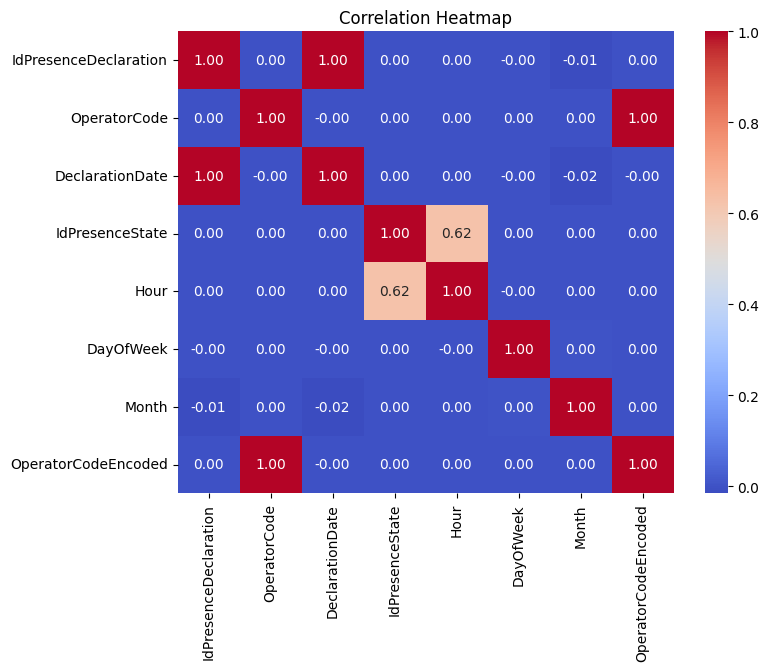

In [151]:
# Correlation Heatmap (useful for numerical features)
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [152]:

# Define features (X) and target (y)
X = cleaned_data.drop(columns=['IdPresenceState'])
y = cleaned_data['IdPresenceState']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((487628, 4), (121908, 4), (487628,), (121908,))

In [153]:


# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)



In [154]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 1.0
Confusion Matrix:
[[60954     0]
 [    0 60954]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     60954
           2       1.00      1.00      1.00     60954

    accuracy                           1.00    121908
   macro avg       1.00      1.00      1.00    121908
weighted avg       1.00      1.00      1.00    121908



In [155]:
# Initialize Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)



In [156]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.4984414476490468
Confusion Matrix:
[[30389 30565]
 [30579 30375]]
Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.50      0.50     60954
           2       0.50      0.50      0.50     60954

    accuracy                           0.50    121908
   macro avg       0.50      0.50      0.50    121908
weighted avg       0.50      0.50      0.50    121908

